In [2]:
#THIS CODE ONLY DO THE WHOLE DATA TRAINING, NO CROSS_VALIDATION AND FEATURE SELECTION
import pandas as pd
import numpy as np
import newSom
import TDSM_SOM
import dataset_read
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [3]:
dataread = dataset_read.DATAREAD()

In [4]:
csv = pd.read_csv("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv")
dataread.stringToIntDataUserModelDataSet(csv," UNS")
csv_test = csv.sample(int(csv.shape[0]*0.3))
csv_training = csv.drop(csv_test.index,axis = 0)
dataread.initializedataset(csv_training,csv_test," UNS")

neuron unit number: 4
*******************

Error Data percentage 0.5359116022099447
right_data0_score_W0 1.0 
error_data0_score_W1 0.3285019075265658 
error_data0_score_W0 0.11978416707527306
combinedweight shape 0: (8, 5)
right_data0_score_W' 0.406322853546105 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 0.1086285040201161 
error_data1_score_W0 0.06767907303370786
combinedweight shape1 : (12, 5)
right_data1_score_W' 0.03787115846923527 
Finish one training *********
2
right_data2_score_W0 1.0 
error_data2_score_W1 0.24279835390946503 
error_data2_score_W0 0.08333333333333333
combinedweight shape1 : (16, 5)
right_data2_score_W' 0.21580782642386673 
Finish one training *********
3
right_data3_score_W0 1.0 
error_data3_score_W1 -0.2 
error_data3_score_W0 -0.2857142857142857
combinedweight shape1 : (20, 5)
right_data3_score_W' 0.16 
Finish one training *********
4
right_data4_score_W0 1.0 
error_data4_score_W1 1.0 
error_data4_score_W0 1.0
Error data can

all_train_score_W0: 0.3630295289893773
all_train_score_W': 1.0
test_score_W0 : 0.23566290238315316
test_score_W': 0.43010013519396895
neuron unit number: 52
*******************

Error Data percentage 0.22099447513812154
right_data0_score_W0 1.0 
error_data0_score_W1 0.8347292850732875 
error_data0_score_W0 0.4140220503136992
combinedweight shape 0: (104, 5)
right_data0_score_W' 0.4703210280957472 
Finish one training *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 1.0
Error data can be represented by W0 1
combinedweight shape1 : (156, 5)
right_data1_score_W' 0.5218370103556956 
Finish one training *********
2
 NO Error Data, Finish Training!
all_train_score_W0: 0.4978658302615305
all_train_score_W': 1.0
test_score_W0 : 0.3935940905989367
test_score_W': 0.371675912023571
neuron unit number: 56
*******************

Error Data percentage 0.2983425414364641
right_data0_score_W0 1.0 
error_data0_score_W1 0.6751126898463256 
error_data0_score_W0 0.3679930

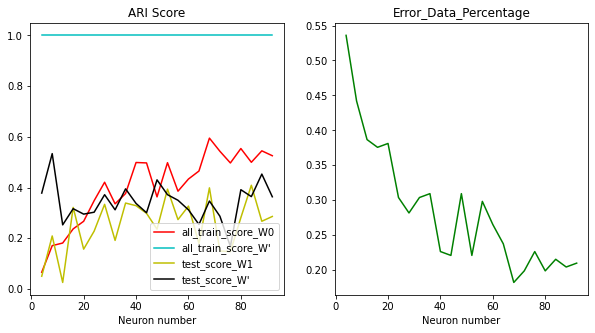

        Variable     N      Mean        SD        SE  95% Conf.  Interval
0  test_score_W0  23.0  0.253382  0.103479  0.021577   0.208634  0.298129
1  test_score_W'  23.0  0.342834  0.074798  0.015596   0.310489  0.375179
2       combined  46.0  0.298108  0.100075  0.014755   0.268389  0.327826
                              Independent t-test  results
0  Difference (test_score_W0 - test_score_W') =   -0.0895
1                          Degrees of freedom =   44.0000
2                                           t =   -3.3599
3                       Two side test p value =    0.0016
4                      Difference < 0 p value =    0.0008
5                      Difference > 0 p value =    0.9992
6                                   Cohen's d =   -0.9908
7                                   Hedge's g =   -0.9738
8                               Glass's delta =   -0.8644
9                                 Pearson's r =    0.4519


C:\Users\fooli\anaconda3\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


Ttest_indResult(statistic=-3.35989710427217, pvalue=0.0008097381056689241)

In [6]:
# local scope2
scoretype = 2
scope_num = 23
class_num = 4
dim_num = 5
unstable_repeat_num = 1


unit_list = []    
all_train_score_W0 =[]
all_train_score_W_combine =[]
test_score_W0 = []
test_score_W_combine= []
error_data_percentage = []

all_train_score_W0_global =[]
all_train_score_W_combine_global =[]
test_score_W0_global = []
test_score_W_combine_global = []

p_values = []

y = 1
while y <= unstable_repeat_num:
    x = 1
    while x <= scope_num:
        unit_list.append(class_num*x)
        print("neuron unit number: {}".format(class_num*x))
        print("*******************\n")
        som = newSom.SOM(m= class_num, n= x, dim=dim_num)  
        optimize_W = TDSM_SOM.TDSM_SOM(som,dataread.data_train,dataread.data_test,dataread.label_train,dataread.label_test,class_num)
        optimize_W.run(20,scoretype)
        
        all_train_score_W0.append(optimize_W.all_train_score_W0)
        all_train_score_W_combine.append(optimize_W.all_train_score_W_Combined)
        test_score_W0.append(optimize_W.test_score_W0)
        test_score_W_combine.append(optimize_W.test_score_W_combined)
        error_data_percentage.append(optimize_W.first_error_data_percentage)
        
        all_train_score_W0_global.append(optimize_W.all_train_score_W0)
        all_train_score_W_combine_global.append(optimize_W.all_train_score_W_Combined)
        test_score_W0_global.append(optimize_W.test_score_W0)
        test_score_W_combine_global.append(optimize_W.test_score_W_combined)

        
        x = x+1

    
    figure, axis = plt.subplots(1, 2,figsize=(10, 5))

    if scoretype == 0:
        axis[0].set_title("Purity Score")
    elif scoretype == 1:
        axis[0].set_title("NMI Score")
    elif scoretype == 2:
        axis[0].set_title("ARI Score")
            
    axis[0].set_xlabel('Neuron number')
    axis[0].plot(unit_list,all_train_score_W0,'r',label ='all_train_score_W0')
    axis[0].plot(unit_list,all_train_score_W_combine,'c',label ='all_train_score_W\'')
    axis[0].plot(unit_list,test_score_W0,'y',label ='test_score_W1')
    axis[0].plot(unit_list,test_score_W_combine,'k',label ='test_score_W\'')
    axis[0].legend()
    
    axis[1].set_title("Error_Data_Percentage")
    axis[1].set_xlabel('Neuron number')
    axis[1].plot(unit_list,error_data_percentage,'g')

    plt.show()
    y =y+1
    #reset
    unit_list = []  
    all_train_score_W0 =[]
    all_train_score_W_combine =[]
    test_score_W0 = []
    test_score_W_combine= []
    error_data_percentage = []
    

df1 = pd.DataFrame(test_score_W0_global, columns = ['test_score_W0'])
df2 = pd.DataFrame(test_score_W_combine_global, columns = ['test_score_W\''])

summary, results = rp.ttest(group1= df1['test_score_W0'], group1_name= "test_score_W0",
                            group2= df2['test_score_W\''], group2_name= "test_score_W\'")
print(summary)
print(results)

stats.ttest_ind(test_score_W0_global, test_score_W_combine_global,alternative = 'less')

neuron unit number: 4
*******************

Error Data percentage 0.580110497237569
right_data0_score_W0 1.0 
error_data0_score_W1 0.4666666666666667 
error_data0_score_W0 0.5714285714285714
combinedweight shape 0: (8, 5)
right_data0_score_W' 0.6973684210526315 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 0.5892857142857143 
error_data1_score_W0 0.4642857142857143
combinedweight shape1 : (12, 5)
right_data1_score_W' 0.7959183673469388 
Finish one splitting *********
2
right_data2_score_W0 1.0 
error_data2_score_W1 0.6521739130434783 
error_data2_score_W0 0.6086956521739131
combinedweight shape1 : (16, 5)
right_data2_score_W' 0.7575757575757576 
Finish one splitting *********
3
right_data3_score_W0 1.0 
error_data3_score_W1 0.875 
error_data3_score_W0 0.75
combinedweight shape1 : (20, 5)
right_data3_score_W' 0.9333333333333333 
Finish one splitting *********
4
right_data4_score_W0 1.0 
error_data4_score_W1 1.0 
error_data4_score_W0 1.0
Error data can b

right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 0.75
combinedweight shape1 : (144, 5)
right_data1_score_W' 0.7291666666666666 
Finish one splitting *********
2
 NO Error Data, Finish Training!
split_num 2
all_train_score_W0: 0.6906077348066298
all_train_score_W': 1.0
test_score_W0 : 0.6623376623376623
test_score_W': 0.6883116883116883
class_num*x*(optimize_W.split_num +1)144
neuron unit number: 52
*******************

Error Data percentage 0.27071823204419887
right_data0_score_W0 1.0 
error_data0_score_W1 0.9591836734693877 
error_data0_score_W0 0.673469387755102
combinedweight shape 0: (104, 5)
right_data0_score_W' 0.8181818181818182 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 0.5
combinedweight shape1 : (156, 5)
right_data1_score_W' 0.5957446808510638 
Finish one splitting *********
2
 NO Error Data, Finish Training!
split_num 2
all_train_score_W0: 0.7292817679558011
all_train_score_W': 1.0
test_s

error_data0_score_W0 0.6610169491525424
combinedweight shape 0: (192, 5)
right_data0_score_W' 0.8278688524590164 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 0.75
combinedweight shape1 : (288, 5)
right_data1_score_W' 0.7454545454545455 
Finish one splitting *********
2
 NO Error Data, Finish Training!
split_num 2
all_train_score_W0: 0.6740331491712708
all_train_score_W': 1.0
test_score_W0 : 0.6103896103896104
test_score_W': 0.6753246753246753
class_num*x*(optimize_W.split_num +1)288
neuron unit number: 100
*******************

Error Data percentage 0.23756906077348067
right_data0_score_W0 1.0 
error_data0_score_W1 0.9767441860465116 
error_data0_score_W0 0.813953488372093
combinedweight shape 0: (200, 5)
right_data0_score_W' 0.7753623188405797 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 1.0
Error data can be represented by W0 1
combinedweight shape1 : (300, 5)
ri

Error Data percentage 0.292817679558011
right_data0_score_W0 1.0 
error_data0_score_W1 0.9622641509433962 
error_data0_score_W0 0.7547169811320755
combinedweight shape 0: (296, 5)
right_data0_score_W' 0.828125 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 0.5
combinedweight shape1 : (444, 5)
right_data1_score_W' 0.7254901960784313 
Finish one splitting *********
2
 NO Error Data, Finish Training!
split_num 2
all_train_score_W0: 0.7071823204419889
all_train_score_W': 1.0
test_score_W0 : 0.6103896103896104
test_score_W': 0.6363636363636364
class_num*x*(optimize_W.split_num +1)444
neuron unit number: 152
*******************

Error Data percentage 0.2265193370165746
right_data0_score_W0 1.0 
error_data0_score_W1 0.8780487804878049 
error_data0_score_W0 0.8048780487804879
combinedweight shape 0: (304, 5)
right_data0_score_W' 0.8285714285714286 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
er

Error Data percentage 0.20441988950276244
right_data0_score_W0 1.0 
error_data0_score_W1 0.972972972972973 
error_data0_score_W0 0.7027027027027027
combinedweight shape 0: (408, 5)
right_data0_score_W' 0.8194444444444444 
Finish one splitting *********
1
right_data1_score_W0 1.0 
error_data1_score_W1 1.0 
error_data1_score_W0 1.0
Error data can be represented by W0 1
combinedweight shape1 : (612, 5)
right_data1_score_W' 0.7777777777777778 
Finish one splitting *********
2
 NO Error Data, Finish Training!
split_num 2
all_train_score_W0: 0.7955801104972375
all_train_score_W': 1.0
test_score_W0 : 0.6753246753246753
test_score_W': 0.6623376623376623
class_num*x*(optimize_W.split_num +1)612
neuron unit number: 208
*******************

Error Data percentage 0.281767955801105
right_data0_score_W0 1.0 
error_data0_score_W1 0.9215686274509803 
error_data0_score_W0 0.7647058823529411
combinedweight shape 0: (416, 5)
right_data0_score_W' 0.8 
Finish one splitting *********
1
right_data1_score_W0 

C:\Users\fooli\anaconda3\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


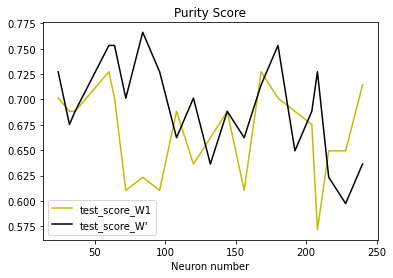

In [5]:
scoretype = 0
scope_num = 60
class_num = 4
dim_num = 5
unstable_repeat_num = 1
unit_list = []    
all_train_score_W0 =[]
all_train_score_W_combine =[]
test_score_W0 = []
test_score_W_combine= []
error_data_percentage = []

initial_som_result = dict()
splitted_number_result = dict()

all_train_score_W0_global =[]
all_train_score_W_combine_global =[]
test_score_W0_global = []
test_score_W_combine_global = []

p_values = []
y = 1


while y <= unstable_repeat_num:
    x = 1
    while x <= scope_num:
        unit_list.append(class_num*x)
        print("neuron unit number: {}".format(class_num*x))
        print("*******************\n")
        som = newSom.SOM(m= class_num, n= x, dim=dim_num)  
        optimize_W = TDSM_SOM.TDSM_SOM(som,dataread.data_train,dataread.data_test,dataread.label_train,dataread.label_test,class_num)
        optimize_W.run(20,scoretype)
        
        if optimize_W.W0IsBest == False:       
            all_train_score_W0.append(optimize_W.all_train_score_W0)
            all_train_score_W_combine.append(optimize_W.all_train_score_W_Combined)
            test_score_W0.append(optimize_W.test_score_W0)
            test_score_W_combine.append(optimize_W.test_score_W_combined)
            error_data_percentage.append(optimize_W.first_error_data_percentage)
            
            all_train_score_W0_global.append(optimize_W.all_train_score_W0)
            all_train_score_W_combine_global.append(optimize_W.all_train_score_W_Combined)
            test_score_W0_global.append(optimize_W.test_score_W0)
            test_score_W_combine_global.append(optimize_W.test_score_W_combined)        
            if (scoretype==0):
                splitted_number_result[class_num*x*(optimize_W.split_num +1)] = optimize_W.test_score_W_combined 
                print("class_num*x*(optimize_W.split_num +1){}".format(class_num*x*(optimize_W.split_num +1)))
                initial_som_result[class_num*x] = optimize_W.test_score_W0 
        
        x=x+1

    if (scoretype!=0):
        figure, axis = plt.subplots(1, 2,figsize=(10, 5))
        if scoretype == 1:
            axis[0].set_title("NMI Score")
        elif scoretype == 2:
            axis[0].set_title("ARI Score")

        
        axis[0].set_xlabel('Neuron number')
        axis[0].plot(unit_list,all_train_score_W0,'r',label ='all_train_score_W0')
        axis[0].plot(unit_list,all_train_score_W_combine,'c',label ='all_train_score_W\'')
        axis[0].plot(unit_list,test_score_W0,'y',label ='test_score_W1')
        axis[0].plot(unit_list,test_score_W_combine,'k',label ='test_score_W\'')
        axis[0].legend()

        axis[1].set_title("Error_Data_Percentage")
        axis[1].set_xlabel('Neuron number')
        axis[1].plot(unit_list,error_data_percentage,'g')

        plt.show()
    
    y =y+1
    #reset
    unit_list = []  
    all_train_score_W0 =[]
    all_train_score_W_combine =[]
    test_score_W0 = []
    test_score_W_combine= []
    error_data_percentage = []

                   
                                      
if (scoretype!=0):
    df1 = pd.DataFrame(test_score_W0_global, columns = ['test_score_W0'])
    df2 = pd.DataFrame(test_score_W_combine_global, columns = ['test_score_W\''])
else: 
    test_score_W0_global =[] #reset test_score_W0_global
    test_score_W_combine_global = []
    
    od = collections.OrderedDict(sorted(splitted_number_result.items()))
    
    keys = od.keys()
    for s in keys:
        if s in initial_som_result:
            test_score_W_combine_global.append(od[s])
            test_score_W0_global.append(initial_som_result[s])
            unit_list.append(s)
            print("s {}  value {} ".format(s,od[s]))
        
    df1 = pd.DataFrame(test_score_W0_global, columns = ['test_score_W0'])                                
    df2 = pd.DataFrame(test_score_W_combine_global, columns = ['test_score_W\''])                          
    


summary, results = rp.ttest(group1= df1['test_score_W0'], group1_name= "test_score_W0",
                            group2= df2['test_score_W\''], group2_name= "test_score_W\'")
print(summary)
print(results)

stats.ttest_ind(test_score_W0_global, test_score_W_combine_global,alternative = 'less')


                                      
if scoretype == 0:
    plt.title("Purity Score")      
    plt.xlabel('Neuron number')
    plt.plot(unit_list,test_score_W0_global,'y',label ='test_score_W1')
    plt.plot(unit_list,test_score_W_combine_global,'k',label ='test_score_W\'')
    plt.legend()
    plt.show()                                                                         
                   